# TP : Location de vélos en libre-service

L’organisme de gestion d’un système de location de vélos en libre-service (ex: Vélib) cherche à organiser ses équipes de maintenance pour répondre au mieux à la demande de ses clients.
<br> <br> **Votre mission :** <br>
Réaliser un modèle permettant de prédire le nombre de vélos loués par heure

**Objectifs de ce TP :** <br>
* Dérouler la méthodologie du « POC » sur une problématique donnée
* Utiliser les grandes familles d’algorithmes présentées en cours
* Mettre en place les pratiques adaptées pour l’entraînement d’un modèle

**Format du rendu :** <br>
* Le code fourni doit être écrit en Python et en format Jupyter Notebook. ​
* Votre notebook doit contenir du code, du texte et des graphiques. Vous devez envoyer l’export HTML de votre notebook avec toutes les cellules exécutées. Assurez-vous que le fichier produit est lisible.​
* Vous pouvez utiliser n’importe quelle libraire Python que vous jugez nécessaire.​
* Il ne s’agit pas d’une competition de type Kaggle : vous ne serez pas uniquement évalué sur la performance du modèle mais plutôt sur la pertinence et la justification de vos choix ainsi que sur la qualité de vos explications.


Voici un descriptif de l'ensemble des variables :
* *instant* - index du relevé
* *dteday* - date du relevé
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver
* *mnth* - mois du relevé (entre 1 et 12)
* *hr* - heure du relevé (entre 0 et 23)
* *holiday* – indique si le jour est un jour de vacances scolaires
* *weekday* - day of the week
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges
* *temp* – température en degrés Celsius
* *atemp* – température ressentie en degrés Celsius
* *humidity* – taux d’humidité
* *windspeed* – vitesse du vent
* *casual* - nombre de locations d’usagers non abonnés
* *registered* – nombre de locations d’usagers abonnés
* *count* – nombre total de locations de vélos

## Questions préalables

**1) Quelle famille d’algorithmes semble adaptée à la mission qui vous a été confiée ?**

La mission consiste à prédire une variable numérique continue : le nombre total de locations de vélos par heure. Par conséquent, il s'agit d'un problème de **régression**
aussi nous avons des données etiquetté donc nous faisons face au **algorithme supervisé**

**2) Quelles variables sont susceptibles de constituer une « cible » ?**

Nous avons la variable count, qui représente le nombre total de locations de vélos. Cependant, pour des raisons d'identification, nous allons inclure la variable index, qui nous permettra d'identifier de manière unique un client, mais elle ne sera pas incluse lors de l'entraînement et la prédiction.

## Imports

Vous ajouterez les éventuels imports supplémentaires nécessaires à la cellule ci-dessous :

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extraction et prise en main de la donnée

Dans cette partie, on va commencer par lire les données et vérifier leur intégrité. C'est également le moment de s'assurer qu'on comprend bien l'ensemble des champs que l'on a à disposition.

In [ ]:
df = pd.read_csv("velo.csv")
df.head()

instant      dteday  season  mnth  hr  holiday  weekday  weathersit  temp  \
0        1  2011-01-01       1     1   0        0        6           1  9.84   
1        2  2011-01-01       1     1   1        0        6           1  9.02   
2        3  2011-01-01       1     1   2        0        6           1  9.02   
3        4  2011-01-01       1     1   3        0        6           1  9.84   
4        5  2011-01-01       1     1   4        0        6           1  9.84   

    atemp   hum  windspeed  casual  registered  cnt  
0  14.395  81.0        0.0       3          13   16  
1  13.635  80.0        0.0       8          32   40  
2  13.635  80.0        0.0       5          27   32  
3  14.395  75.0        0.0       3          10   13  
4  14.395  75.0        0.0       0           1    1

verification des colonnes présentes ( on remarque la presence de toutes les colonnes)

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [ ]:
df.dtypes

instant         int64
dteday         object
season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
df.describe()

instant        season          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      6.537775     11.546752      0.028770   
std     5017.0295      1.106918      3.438776      6.914405      0.167165   
min        1.0000      1.000000      1.000000      0.000000      0.000000   
25%     4345.5000      2.000000      4.000000      6.000000      0.000000   
50%     8690.0000      3.000000      7.000000     12.000000      0.000000   
75%    13034.5000      3.000000     10.000000     18.000000      0.000000   
max    17379.0000      4.000000     12.000000     23.000000      1.000000   

            weekday    weathersit          temp         atemp           hum  \
count  17379.000000  17379.000000  17379.000000  17379.000000  15715.000000   
mean       3.003683      1.425283     20.376474     23.788755     62.774038   
std        2.005771      0.639357      7.894801      8.592511     19.321135   
min        0.000000      1.000000      0.820000      0.000000      0.000000   
25%        1.000000      1.000000     13.940000     16.665000     48.000000   
50%        3.000000      1.000000     20.500000     24.240000     63.000000   
75%        5.000000      2.000000     27.060000     31.060000     78.500000   
max        6.000000      4.000000     41.000000     50.000000    100.000000   

          windspeed        casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  17379.000000  
mean      12.736540     35.676218    153.786869    189.463088  
std        8.196795     49.305030    151.357286    181.387599  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     34.000000     40.000000  
50%       12.998000     17.000000    115.000000    142.000000  
75%       16.997900     48.000000    220.000000    281.000000  
max       56.996900    367.000000    886.000000    977.000000

**3) A partir de ces analyses ainsi que d'analyses additionnelles dont le code sera exécuté ci-dessous, quelles remarques pouvez-vous faire sur la qualité de données ? Le descriptif des variables vous paraît-il complet et exact ?**

on peut constater :
- Unicité des enregistrements
- Valeurs manquantes sur la colonnes hum (9,5%)
- Bon typage de variables
- forte correlation entre count et (causal,registered) a verifier ci dessous

# **Analyse Additionelle**

In [ ]:
df.isnull().sum()

instant          0
dteday           0
season           0
mnth             0
hr               0
holiday          0
weekday          0
weathersit       0
temp             0
atemp            0
hum           1664
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

In [ ]:
df.shape

(17379, 15)

In [ ]:
df['instant'].nunique()

17379

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix

instant    season      mnth        hr   holiday   weekday  \
instant     1.000000  0.404046  0.489164 -0.004775  0.014723  0.001357   
season      0.404046  1.000000  0.830386 -0.006117 -0.009585 -0.002335   
mnth        0.489164  0.830386  1.000000 -0.005772  0.018430  0.010400   
hr         -0.004775 -0.006117 -0.005772  1.000000  0.000479 -0.003498   
holiday     0.014723 -0.009585  0.018430  0.000479  1.000000 -0.102088   
weekday     0.001357 -0.002335  0.010400 -0.003498 -0.102088  1.000000   
weathersit -0.014198 -0.014524  0.005400 -0.020203 -0.017036  0.003311   
temp        0.136178  0.312025  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.137615  0.319380  0.208096  0.133750 -0.030973 -0.008821   
hum         0.010122  0.148855  0.163169 -0.277445 -0.012943 -0.036519   
windspeed  -0.074505 -0.149773 -0.135386  0.137252  0.003988  0.011502   
casual      0.158295  0.120206  0.068457  0.301202  0.031564  0.032721   
registered  0.282046  0.174226  0.122273  0.374141 -0.047345  0.021578   
cnt         0.278379  0.178056  0.120638  0.394071 -0.030927  0.026900   

            weathersit      temp     atemp       hum  windspeed    casual  \
instant      -0.014198  0.136178  0.137615  0.010122  -0.074505  0.158295   
season       -0.014524  0.312025  0.319380  0.148855  -0.149773  0.120206   
mnth          0.005400  0.201691  0.208096  0.163169  -0.135386  0.068457   
hr           -0.020203  0.137603  0.133750 -0.277445   0.137252  0.301202   
holiday      -0.017036 -0.027340 -0.030973 -0.012943   0.003988  0.031564   
weekday       0.003311 -0.001795 -0.008821 -0.036519   0.011502  0.032721   
weathersit    1.000000 -0.102640 -0.105563  0.418460   0.026226 -0.152628   
temp         -0.102640  1.000000  0.987672 -0.071431  -0.023125  0.459616   
atemp        -0.105563  0.987672  1.000000 -0.053413  -0.062336  0.454080   
hum           0.418460 -0.071431 -0.053413  1.000000  -0.290312 -0.349694   
windspeed     0.026226 -0.023125 -0.062336 -0.290312   1.000000  0.090287   
casual       -0.152628  0.459616  0.454080 -0.349694   0.090287  1.000000   
registered   -0.120966  0.335361  0.332559 -0.273633   0.082321  0.506618   
cnt          -0.142426  0.404772  0.400929 -0.323060   0.093234  0.694564   

            registered       cnt  
instant       0.282046  0.278379  
season        0.174226  0.178056  
mnth          0.122273  0.120638  
hr            0.374141  0.394071  
holiday      -0.047345 -0.030927  
weekday       0.021578  0.026900  
weathersit   -0.120966 -0.142426  
temp          0.335361  0.404772  
atemp         0.332559  0.400929  
hum          -0.273633 -0.323060  
windspeed     0.082321  0.093234  
casual        0.506618  0.694564  
registered    1.000000  0.972151  
cnt           0.972151  1.000000

## Préparation

Gestion des valeurs manquantes ( etant données que nous navons pas une forte correlation entre hum et d'autres variables je propose d'imputer par la moyenne )

In [ ]:
# Calcul du mode de la colonne 'hum'
mode_humidity = df["hum"].mean()

# Remplacement des valeurs manquantes par le mode
df["hum"].fillna(mode_humidity, inplace=True)

<ipython-input-11-a051c68f0762>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["hum"].fillna(mode_humidity, inplace=True)


**4) Quelles sont les variables catégorielles ? Les variables numériques ? En complétant le code ci-dessous, vous vous assurerez du bon typage de la donnée à traiter.**

In [ ]:
cat_vars  = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']

In [ ]:
for c in cat_vars:
    df[c] = df[c].astype('category')

## Exploration

**5) Que pouvez-vous analyser à partir des graphiques ci-dessous ?**

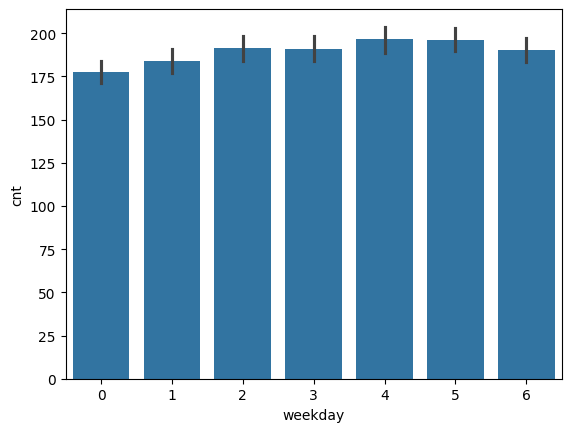

In [ ]:
sns.barplot(x="weekday", y="cnt", data=df, estimator=np.mean)
plt.show()

 l'impact du jour de la semaine sur le nombre moyen de locations de vélos on peut remarquer un impact relativement haut le 4ieme et 5ieme jour de la semaine

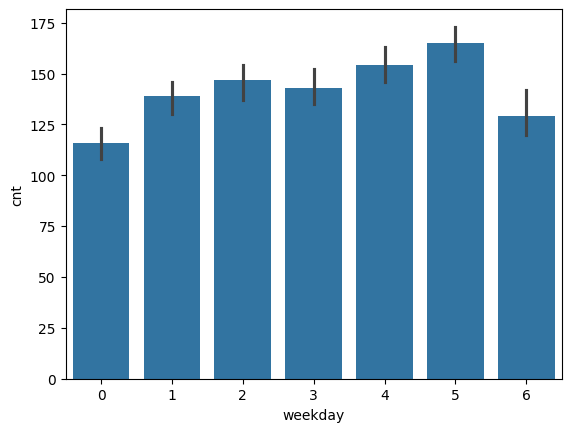

In [ ]:
sns.barplot(x="weekday", y="cnt", data=df, estimator=np.median)
plt.show()

Ce graphique met en évidence le nombre de locations de vélos  pour chaque jour de la semaine. Par exemple, un jour de semaine avec une médiane plus élevée indique que, de manière générale, le nombre de locations de vélos est régulièrement élevé ce jour-là.

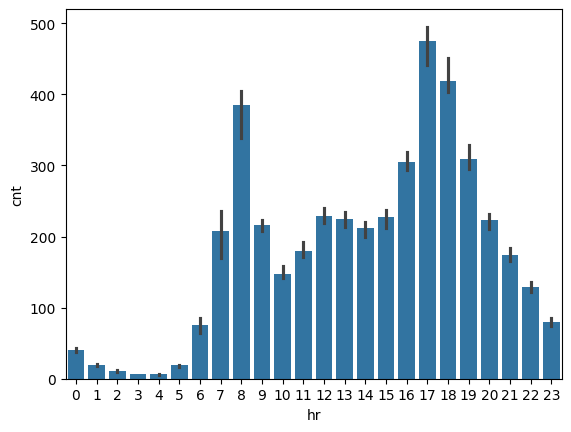

In [ ]:
sns.barplot(x="hr", y="cnt", data=df, estimator=np.median)
plt.show()

ici nous avons le nombre de locations de vélos  pour chaque heure de la journée. une heure de la  journée avec une médiane plus élevée indique un nombre de locations de vélos est régulièrement élevé ce jour-là.

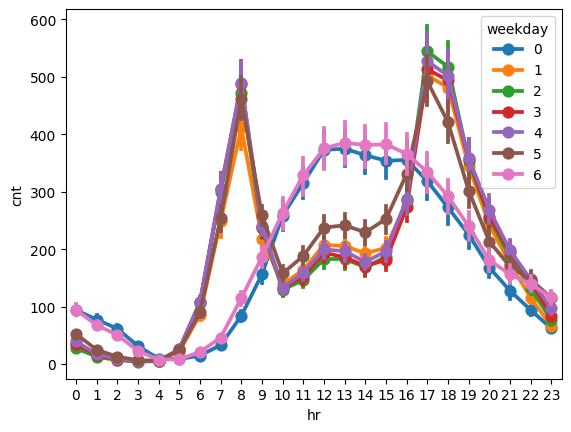

In [ ]:
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday')
plt.show()

Le graphique illustre les variations du nombre de locations de vélos en fonction de l'heure de la journée, avec une distinction par jour de la semaine. On peut constater une allure presque similaire durant les cinq premiers jours, mais une allure différente les sixième et zerotième jours

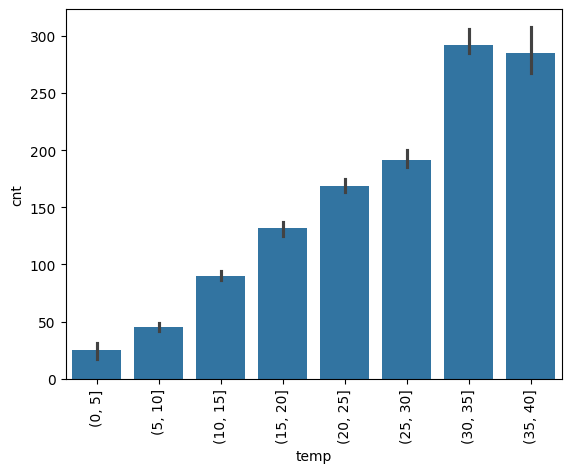

In [ ]:
temp_range = range(0, round(df["temp"].max()), 5)
temp_binned = pd.cut(df["temp"], bins=temp_range)
temp_plot = sns.barplot(x=temp_binned, y=df["cnt"], estimator=np.median)
plt.xticks(rotation=90)
plt.show()

Ce graphique met en évidence comment la température affecte la demande de location de vélos les temperature élevé affecte positivement la location de vélos

**6) Montrez des graphiques supplémentaires pertinents vous permettant de mieux comprendre les facteurs d'impact sur le nombre de vélos loués. Pour chacun de ces graphiques vous proposerez une analyse.**

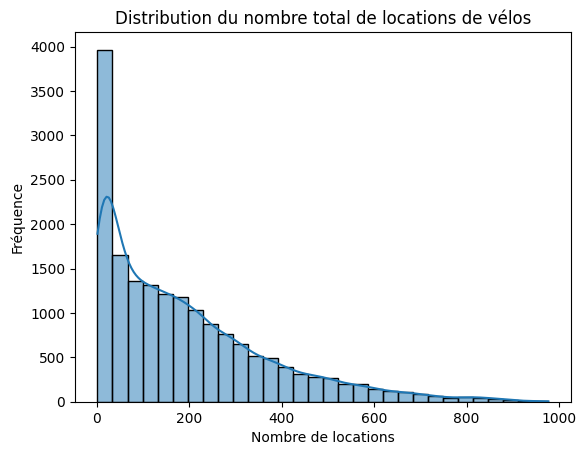

In [ ]:
sns.histplot(df["cnt"], kde=True, bins=30)
plt.title("Distribution du nombre total de locations de vélos")
plt.xlabel("Nombre de locations")
plt.ylabel("Fréquence")
plt.show()


ceci peut indiquer que certains jours/heures ont une demande exceptionnellement élevée ou faible

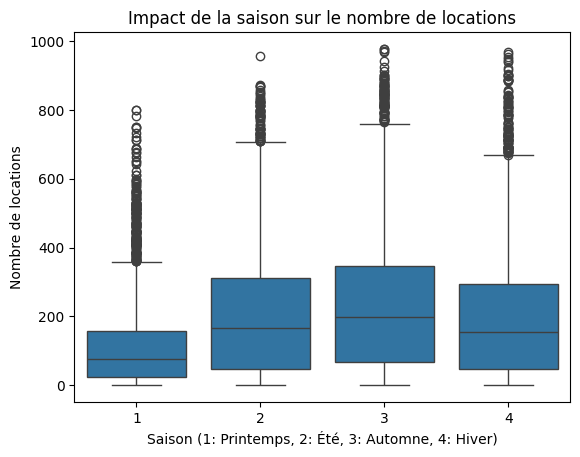

In [ ]:
sns.boxplot(x="season", y="cnt", data=df)
plt.title("Impact de la saison sur le nombre de locations")
plt.xlabel("Saison (1: Printemps, 2: Été, 3: Automne, 4: Hiver)")
plt.ylabel("Nombre de locations")
plt.show()

On pourrait observer un plus grand nombre de locations en été (saison 2) et en automne (saison 3), lorsque le climat est plus favorable. En hiver (saison 4), la médiane des locations pourrait être plus faible en raison des températures froides

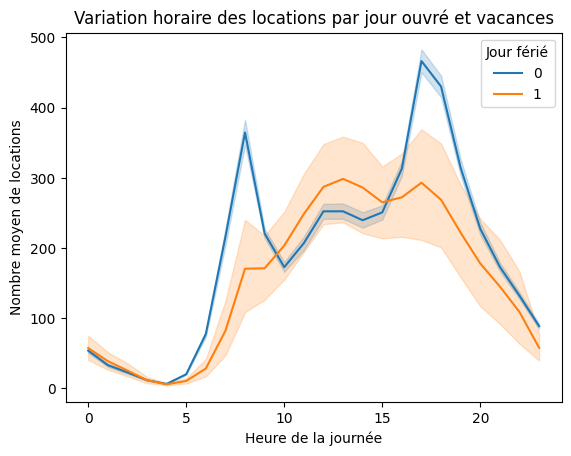

In [ ]:
sns.lineplot(data=df, x="hr", y="cnt", hue="holiday", estimator=np.mean)
plt.title("Variation horaire des locations par jour ouvré et vacances")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre moyen de locations")
plt.legend(title="Jour férié")
plt.show()


Ce graphique permet de voir comment les locations évoluent en fonction des heures de la journée, avec une distinction entre jours fériés et non-fériés

On à des pics aux heures de pointe (matin et soir) pendant les jours ouvrés, alors que les jours fériés montrent une demande plus stable en milieu de journée

**7) Proposez une visualisation pertinente à partir d'une approche non-supervisée**

<ipython-input-22-2f091721f45e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster["Cluster"] = kmeans.fit_predict(scaled_data)


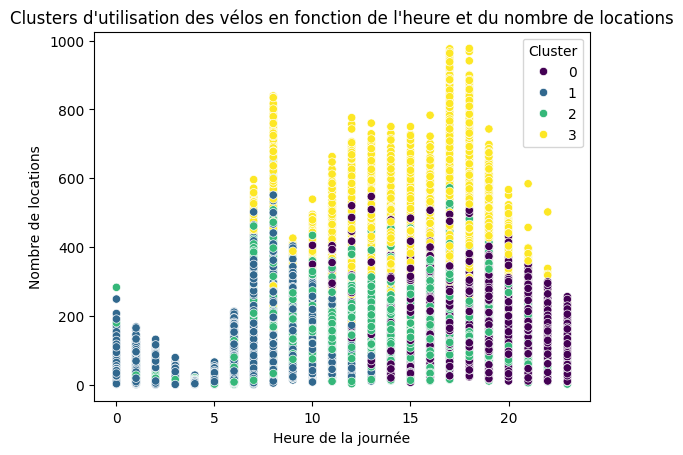

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des variables pertinentes
features = ["hr", "temp", "hum", "windspeed", "cnt"]
df_cluster = df[features]

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Application de K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualisation des clusters
sns.scatterplot(data=df_cluster, x="hr", y="cnt", hue="Cluster", palette="viridis")
plt.title("Clusters d'utilisation des vélos en fonction de l'heure et du nombre de locations")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de locations")
plt.legend(title="Cluster")
plt.show()


Chaque cluster représente un groupe d'heures ou de contextes similaires dans lesquels les vélos sont loués. Par exemple :
Cluster 1 : Utilisation élevée aux heures de pointe en semaine (matin/soir).
Cluster 2 : Usage modéré durant les heures creuses.
Cluster 3 : Forte utilisation pendant les week-ends (activités de loisirs).
Cluster 4 : Faible utilisation par mauvais temps ou heures tardives

<ipython-input-23-d86e88c9042f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster["PCA1"] = pca_data[:, 0]
<ipython-input-23-d86e88c9042f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster["PCA2"] = pca_data[:, 1]


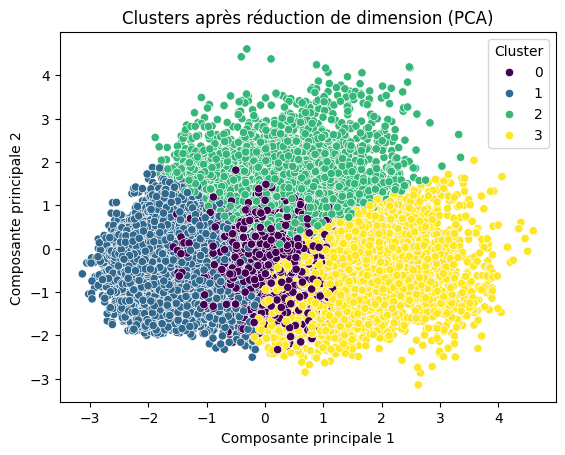

In [ ]:
from sklearn.decomposition import PCA

# Réduction des dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Ajout des clusters aux données PCA
df_cluster["PCA1"] = pca_data[:, 0]
df_cluster["PCA2"] = pca_data[:, 1]

# Visualisation des clusters après réduction de dimensionnalité
sns.scatterplot(data=df_cluster, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.title("Clusters après réduction de dimension (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.show()

Cette visualisation non-supervisée permet de mieux comprendre les motifs sous-jacents dans les données et d’identifier des tendances ou comportements d'utilisation qui ne seraient pas visibles autrement

## Feature Engineering

**8) Ajoutez à ce dataset une "feature" qui vous semble pertinente. Comment pouvez-vous évaluer l'apport potentiel de cette feature ? Montrez les graphiques ou tableaux pertinents pour appuyer votre réponse.**

<ipython-input-24-f3b3817c4ef8>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='time_of_day', y='cnt', order=time_of_day_order, estimator='mean', ci=None, palette='viridis')
<ipython-input-24-f3b3817c4ef8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='time_of_day', y='cnt', order=time_of_day_order, estimator='mean', ci=None, palette='viridis')


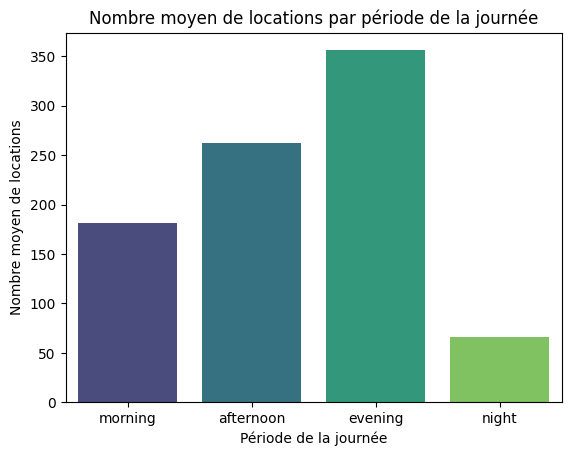

In [ ]:
# Création d'une variable "période de la journée"
def time_of_day(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 21:
        return "evening"
    else:
        return "night"

df['time_of_day'] = df['hr'].apply(time_of_day)

# Calcul des locations moyennes par période de la journée
time_of_day_order = ["morning", "afternoon", "evening", "night"]

# Barplot
sns.barplot(data=df, x='time_of_day', y='cnt', order=time_of_day_order, estimator='mean', ci=None, palette='viridis')

# Ajout des titres et labels
plt.title("Nombre moyen de locations par période de la journée")
plt.xlabel("Période de la journée")
plt.ylabel("Nombre moyen de locations")
plt.show()


In [ ]:
df

instant      dteday season mnth  hr holiday weekday weathersit   temp  \
0            1  2011-01-01      1    1   0       0       6          1   9.84   
1            2  2011-01-01      1    1   1       0       6          1   9.02   
2            3  2011-01-01      1    1   2       0       6          1   9.02   
3            4  2011-01-01      1    1   3       0       6          1   9.84   
4            5  2011-01-01      1    1   4       0       6          1   9.84   
...        ...         ...    ...  ...  ..     ...     ...        ...    ...   
17374    17375  2012-12-31      1   12  19       0       1          2  10.66   
17375    17376  2012-12-31      1   12  20       0       1          2  10.66   
17376    17377  2012-12-31      1   12  21       0       1          1  10.66   
17377    17378  2012-12-31      1   12  22       0       1          1  10.66   
17378    17379  2012-12-31      1   12  23       0       1          1  10.66   

        atemp   hum  windspeed  casual  registered  cnt time_of_day  
0      14.395  81.0     0.0000       3          13   16       night  
1      13.635  80.0     0.0000       8          32   40       night  
2      13.635  80.0     0.0000       5          27   32       night  
3      14.395  75.0     0.0000       3          10   13       night  
4      14.395  75.0     0.0000       0           1    1       night  
...       ...   ...        ...     ...         ...  ...         ...  
17374  12.880  60.0    11.0014      11         108  119     evening  
17375  12.880  60.0    11.0014       8          81   89     evening  
17376  12.880  60.0    11.0014       7          83   90       night  
17377  13.635  56.0     8.9981      13          48   61       night  
17378  13.635  65.0     8.9981      12          37   49       night  

[17379 rows x 16 columns]

In [ ]:
df = pd.get_dummies(df, columns=['time_of_day'], drop_first=True)
df

instant      dteday season mnth  hr holiday weekday weathersit   temp  \
0            1  2011-01-01      1    1   0       0       6          1   9.84   
1            2  2011-01-01      1    1   1       0       6          1   9.02   
2            3  2011-01-01      1    1   2       0       6          1   9.02   
3            4  2011-01-01      1    1   3       0       6          1   9.84   
4            5  2011-01-01      1    1   4       0       6          1   9.84   
...        ...         ...    ...  ...  ..     ...     ...        ...    ...   
17374    17375  2012-12-31      1   12  19       0       1          2  10.66   
17375    17376  2012-12-31      1   12  20       0       1          2  10.66   
17376    17377  2012-12-31      1   12  21       0       1          1  10.66   
17377    17378  2012-12-31      1   12  22       0       1          1  10.66   
17378    17379  2012-12-31      1   12  23       0       1          1  10.66   

        atemp   hum  windspeed  casual  registered  cnt  time_of_day_evening  \
0      14.395  81.0     0.0000       3          13   16                False   
1      13.635  80.0     0.0000       8          32   40                False   
2      13.635  80.0     0.0000       5          27   32                False   
3      14.395  75.0     0.0000       3          10   13                False   
4      14.395  75.0     0.0000       0           1    1                False   
...       ...   ...        ...     ...         ...  ...                  ...   
17374  12.880  60.0    11.0014      11         108  119                 True   
17375  12.880  60.0    11.0014       8          81   89                 True   
17376  12.880  60.0    11.0014       7          83   90                False   
17377  13.635  56.0     8.9981      13          48   61                False   
17378  13.635  65.0     8.9981      12          37   49                False   

       time_of_day_morning  time_of_day_night  
0                    False               True  
1                    False               True  
2                    False               True  
3                    False               True  
4                    False               True  
...                    ...                ...  
17374                False              False  
17375                False              False  
17376                False               True  
17377                False               True  
17378                False               True  

[17379 rows x 18 columns]

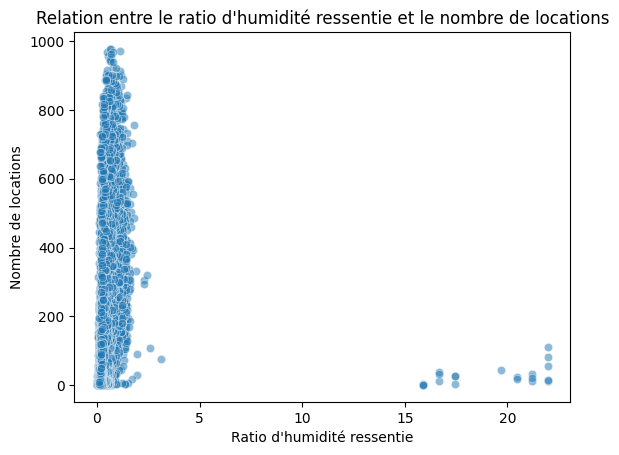

In [ ]:
#interaction entre le vent et la temperature
df['temp_wind_interaction'] = df['temp'] * df['windspeed']
# Calcul du ratio de l'humidité ressentie
df['humidity_ratio'] = df['atemp'] / df['hum']

df['humidity_ratio'] = df.apply(lambda row: row['atemp'] if row['hum'] == 0 else row['humidity_ratio'], axis=1)


sns.scatterplot(data=df, x='humidity_ratio', y='cnt', alpha=0.5)
plt.title("Relation entre le ratio d'humidité ressentie et le nombre de locations")
plt.xlabel("Ratio d'humidité ressentie")
plt.ylabel("Nombre de locations")
plt.show()

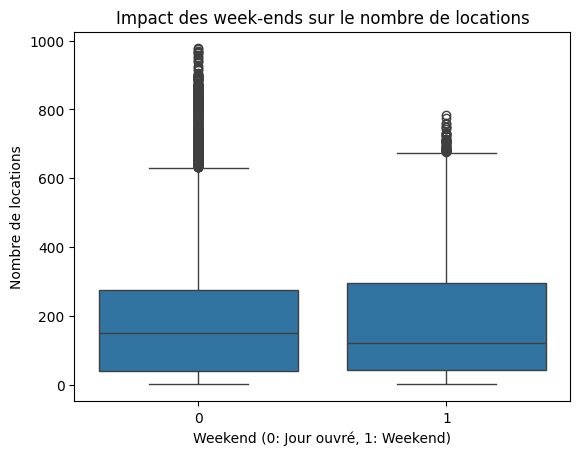

In [ ]:
# Binarisation des conditions météo (weather)
df['bad_weather'] = df['weathersit'].apply(lambda x: 1 if x >= 3 else 0)
# Création de la feature "weekend" : 1 si samedi ou dimanche, sinon 0
df['weekend'] = df['weekday'].apply(lambda x: 1 if x in [6, 0] else 0)


sns.boxplot(data=df, x='weekend', y='cnt')
plt.title("Impact des week-ends sur le nombre de locations")
plt.xlabel("Weekend (0: Jour ouvré, 1: Weekend)")
plt.ylabel("Nombre de locations")
plt.show()

Le boxplot montre des variations nettes entre week-ends et jours ouvrés.  les week-ends  affiche une médiane plus bas, indiquant une baise de demande

## Algorithmes et Validation (entraînement de l'algorithme prédictif)

Dans cette partie, vous allez entraîner un modèle prédictif pour prédire le nombre total de locations de vélos. **Utilisez la librairie sklearn** et lisez attentivement la documentation des fonctions que vous serez amenés à choisir. De manière générale, **commencez simple** et vous pourrez améliorer votre modèle dans la partie suivante, ou donner vos pistes de réflexion à la fin de ce TP.

**9) Séparez au sein du dataset vos jeux d'entraînement et de test. A quoi cette étape sert-elle ?**

Le jeu d'entraînement est utilisé pour apprendre et ajuster les paramètres du modèle, tandis que le jeu de test est utilisé pour évaluer la performance du modèle sur des données qu'il n'a jamais vues. Cela permet de vérifier la généralisabilité du modèle

In [ ]:
from sklearn.model_selection import train_test_split

df['season'] = pd.to_numeric(df['season'], errors='coerce')  # Saison
df['mnth'] = pd.to_numeric(df['mnth'], errors='coerce')  # Mois
df['hr'] = pd.to_numeric(df['hr'], errors='coerce')  # Heure
df['holiday'] = pd.to_numeric(df['holiday'], errors='coerce')  # Jour de vacances
df['weekday'] = pd.to_numeric(df['weekday'], errors='coerce')  # Jour de la semaine
df['weathersit'] = pd.to_numeric(df['weathersit'], errors='coerce')


# Sélection des variables d'entrée (X) et de sortie (y)
X = df.drop(columns=["cnt", "instant", "dteday", "registered", "casual"])
y = df["cnt"]

# Séparer les données en jeu d'entraînement et jeu de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**10) Choisissez un modèle et indiquez les raisons de ce choix. Si des pré-traitements spécifiques sont nécessaires à la bonne exécution et performance de l'algorithme, vous les effectuerez ici en indiquant pourquoi ils sont nécessaires. Vous pourrez ensuite procéder à l'entraînement de votre modèle à l'aide de la fonction *fit* présente sur l'ensemble des estimateurs sklearn**

- Une Random Forest est une agrégation de plusieurs arbres de décision formés sur des échantillons aléatoires du jeu de données.

- Grâce à la technique de bagging (bootstrap aggregating), elle réduit les risques de sur-apprentissage associés à un arbre de décision unique.

- Les résultats sont plus stables et généralisent mieux sur les nouvelles données ( pas forcement la meilleur methode on verra plus tard)

In [ ]:
import numpy as np
np.isinf(X_train).sum()

season                   0
mnth                     0
hr                       0
holiday                  0
weekday                  0
weathersit               0
temp                     0
atemp                    0
hum                      0
windspeed                0
time_of_day_evening      0
time_of_day_morning      0
time_of_day_night        0
temp_wind_interaction    0
humidity_ratio           0
bad_weather              0
weekend                  0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur le jeu d'entraînement
rf_model.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred = rf_model.predict(X_test)

# Calculer les métriques d'évaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcul du RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred)

# Calcul du MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")


RMSE : 4482.44
MAE : 43.30


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialiser le modèle XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)

# Entraîner le modèle sur le jeu d'entraînement
xgb_model.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred = xgb_model.predict(X_test)

# Calculer les métriques d'évaluation
rmse = mean_squared_error(y_test, y_pred)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE

print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")


RMSE : 4266.75
MAE : 43.96


on remarque des meilleur performance que le random forest cela est du a lapprentisage continue du xgboost pour diminuer le RMSE

IMPORTANCE DES VARIABLES POUR LE RANDOM FOREST

                  Feature  Importance
2                      hr    0.491582
14         humidity_ratio    0.105634
10    time_of_day_evening    0.073281
6                    temp    0.068406
16                weekend    0.053751
7                   atemp    0.031126
0                  season    0.027009
8                     hum    0.024940
13  temp_wind_interaction    0.024278
1                    mnth    0.022848


<ipython-input-33-1be698c81945>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


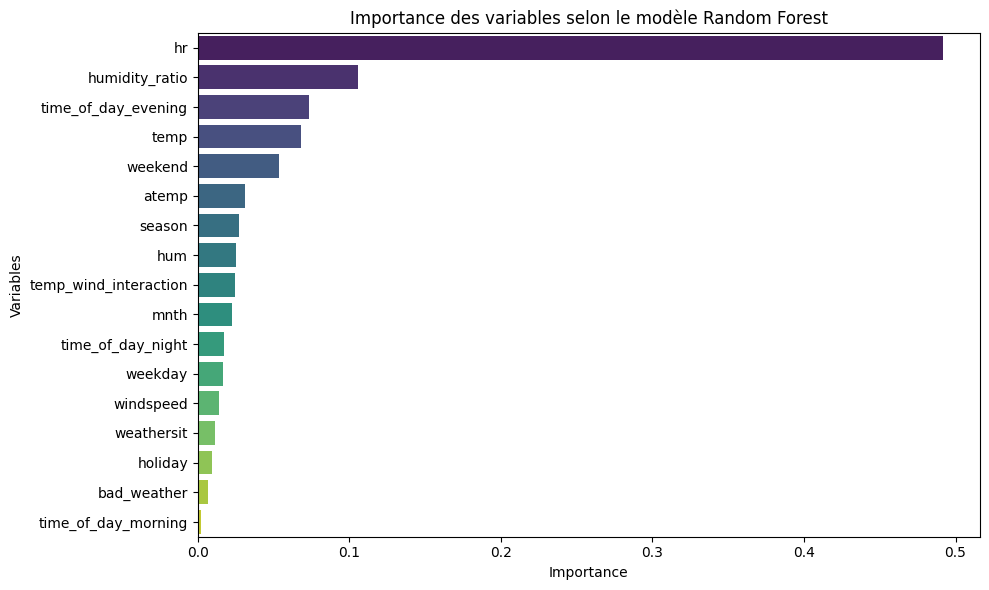

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire les importances des features
feature_importances = rf_model.feature_importances_

# Associer les importances aux noms des colonnes
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les 10 principales variables
print(importance_df.head(10))

# Visualisation des importances des variables
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

# Ajout de titres et labels
plt.title("Importance des variables selon le modèle Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


                Feature  Importance
10  time_of_day_evening    0.297293
2                    hr    0.211505
16              weekend    0.137209
14       humidity_ratio    0.079181
6                  temp    0.063345
0                season    0.057330
5            weathersit    0.044811
3               holiday    0.025122
7                 atemp    0.022619
8                   hum    0.013544


<ipython-input-34-28defdcc7644>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


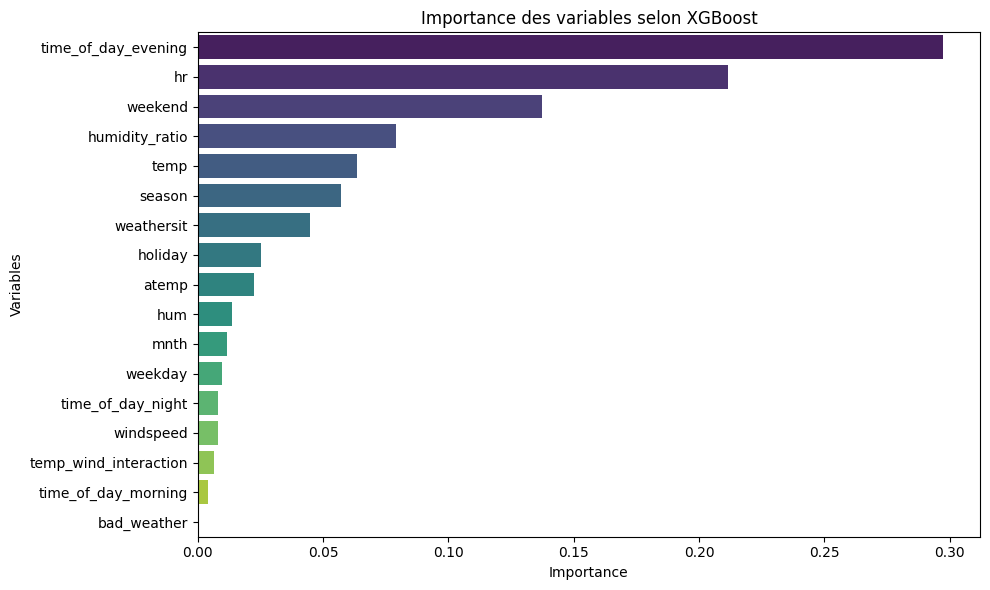

In [ ]:
# Extraire les importances des variables
feature_importances = xgb_model.feature_importances_

# Créer un DataFrame pour les importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les 10 principales variables
print(importance_df.head(10))

# Visualiser les importances des variables
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')

# Ajout des titres et labels
plt.title("Importance des variables selon XGBoost")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


Bon feature engineering pour les deux modèles  on  le remarque par les varible important et explicatif

**11) Ce premier modèle est-il performant ? Comment mesurez-vous sa performance et pourquoi ?**

Le modèle actuel (random forest), basé sur une régression linéaire, est un point de départ intéressant pour explorer les relations entre les variables. Cependant, les performances obtenues, avec un RMSE de 4441.82 et un MAE de 43.29, indiquent que le modèle ne parvient pas à capturer avec précision les tendances présentes dans les données.

Analyse des métriques :
RMSE (Root Mean Squared Error) = 4441.82 :
 Une valeur aussi élevée dans ce contexte indique que les prédictions du modèle divergent fortement des valeurs observées. Cela peut être dû à des relations non linéaires ou à des facteurs non pris en compte par la régression linéaire.

MAE (Mean Absolute Error) = 43.29 :
Le MAE représente l'erreur absolue moyenne entre les valeurs prédites et les valeurs réelles. En moyenne, le modèle se trompe de 43 locations, ce qui reste significatif, particulièrement lorsque les valeurs de la variable cible (count) varient entre 1 et 977

## Améliorer le modèle

**12) Quelles données supplémentaires permettraient d’avoir une prédiction plus précise ? De quelles données aurait-on besoin pour assurer la maintenance complète des bornes de location ?**

Pour améliorer les prédictions :
- Données événements spéciaux, jours fériés.
- Données géographiques .
- Données historiques et comportementales

Pour assurer une maintenance complète :
- Données  technique des vélos .
- Historique des pannes et interventions.

**13) Mettez en place les techniques de régularisation adaptées à l’algorithme choisi**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mis en place  des hyper parametres

**14) Mettez en place le choix des meilleurs hyperparamètres**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 15, 25],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 5, 10]
}

# Initialisation de GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Recherche des meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Best parameters:", grid_search.best_params_)

# Évaluation du modèle optimisé
best_rf_model = grid_search.best_estimator_
best_rf_preds = best_rf_model.predict(X_test)

best_rf_rmse = mean_squared_error(y_test, best_rf_preds)
best_rf_mae = mean_absolute_error(y_test, best_rf_preds)

print("Optimized Random Forest - RMSE: {:.2f}, MAE: {:.2f}".format(best_rf_rmse, best_rf_mae))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Optimized Random Forest - RMSE: 4588.00, MAE: 44.57


In [ ]:
import xgboost as xgb

# DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Définir les paramètres du modèle
params = {
    'objective': 'reg:squarederror',  # Régression avec erreur quadratique
    'random_state': 42,              # Pour la reproductibilité
    'max_depth': 10,                  # Profondeur maximale de chaque arbre
    'learning_rate': 0.1,            # Taux d'apprentissage
    'subsample': 0.8,                # Fraction des échantillons utilisés pour chaque arbre
    'colsample_bytree': 0.8          # Fraction des caractéristiques utilisées par arbre
}

# Validation croisée avec XGBoost
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,      # Nombre d'itérations
    nfold=5,                  # Nombre de plis pour la validation croisée
    metrics='rmse',           # Évaluer la racine de l'erreur quadratique moyenne
    as_pandas=True,           # Retourner les résultats sous forme de DataFrame Pandas
    seed=42                   # Pour la reproductibilité
)

# Afficher les résultats de la validation croisée
print("Résultats de la validation croisée :")
print(cv_results)

# Meilleur score RMSE
best_rmse = cv_results['test-rmse-mean'].min()
print(f"Meilleur RMSE en validation croisée : {best_rmse:.2f}")

# Entraîner un modèle final avec le meilleur nombre d'itérations
optimal_num_boost_round = cv_results['test-rmse-mean'].idxmin()
final_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=optimal_num_boost_round
)

# Prédictions sur l'ensemble de test
dtest = xgb.DMatrix(X_test)
y_pred = final_model.predict(dtest)

# Calcul des métriques sur l'ensemble de test
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Performance sur l'ensemble de test :")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")


Résultats de la validation croisée :
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        167.573029        1.151574      167.974261       4.741938
1        156.148315        1.080590      157.166515       4.645762
2        144.049820        0.971857      145.602273       4.387573
3        133.360109        0.870962      135.525396       4.116620
4        125.857425        0.871570      128.996304       3.928593
..              ...             ...             ...            ...
95        26.079616        0.267926       65.968772       2.007318
96        25.786513        0.215287       65.956460       2.028114
97        25.556395        0.219840       65.925428       2.029927
98        25.394033        0.201677       65.909729       2.023978
99        25.189769        0.232645       65.905290       2.026174

[100 rows x 4 columns]
Meilleur RMSE en validation croisée : 65.91
Performance sur l'ensemble de test :
RMSE : 3932.88
MAE : 41.07


**15) Quelle(s) autre(s) approche(s) aurait pu être pertinente(s) ? Vous pourrez indiquer ici les pistes d'améliorations que vous envsageriez si vous étiez amené à poursuivre ce projet**

Les techniques d'ensemble comme le Bagging, Boosting et Stacking peuvent améliorer la robustesse et la précision des prédictions ( exemple illustrer ci dessus)

Transformation de données : Par exemple, transformer certaines variables avec des fonctions logarithmiques ou exponentielles pourrait rendre certaines relations plus linéaires et plus faciles à capturer par les modèles

Météo externe : Si possible, l'ajout de données météo en temps réel provenant d'API externes ou de sources publiques pourrait améliorer les prédictions sur les locations de vélos, surtout en tenant compte des variations météorologiques qui influencent la demande.

Données géographiques : Ajouter des informations géographiques (par exemple, densité de population, proximité des stations, accessibilité des routes, etc.) pourrait rendre les prédictions plus spécifiques en fonction de la localisation géographique des stations de vélos